In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

608

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Loop through all the cities in the list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    
    


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vardo
Processing Record 2 of Set 1 | kaitangata
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | barrow
Processing Record 5 of Set 1 | plettenberg bay
Processing Record 6 of Set 1 | leningradskiy
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | severo-kurilsk
Processing Record 9 of Set 1 | kieta
Processing Record 10 of Set 1 | pemangkat
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | atuona
Processing Record 13 of Set 1 | bluff
Processing Record 14 of Set 1 | provideniya
Processing Record 15 of Set 1 | tak
Processing Record 16 of Set 1 | kapaa
Processing Record 17 of Set 1 | srednekolymsk
Processing Record 18 of Set 1 | cape town
Processing Record 19 of Set 1 | new norfolk
Processing Record 20 of Set 1 | saint-pierre
Processing Record 21 of Set 1 | busselton
Processing Record 22 of Set 1 | cherskiy
Processing Record 23 of Set 1 | oue

Processing Record 41 of Set 4 | cabo san lucas
Processing Record 42 of Set 4 | motema
Processing Record 43 of Set 4 | ilek
Processing Record 44 of Set 4 | vanimo
Processing Record 45 of Set 4 | piacabucu
Processing Record 46 of Set 4 | dunedin
Processing Record 47 of Set 4 | campbell river
Processing Record 48 of Set 4 | onverwacht
Processing Record 49 of Set 4 | santa maria
Processing Record 50 of Set 4 | mehamn
Processing Record 1 of Set 5 | amderma
City not found. Skipping...
Processing Record 2 of Set 5 | sarangani
Processing Record 3 of Set 5 | esperance
Processing Record 4 of Set 5 | ikornnes
Processing Record 5 of Set 5 | oistins
Processing Record 6 of Set 5 | hwange
Processing Record 7 of Set 5 | aberdeen
Processing Record 8 of Set 5 | cuiluan
Processing Record 9 of Set 5 | santa cruz
Processing Record 10 of Set 5 | wundanyi
Processing Record 11 of Set 5 | maghama
City not found. Skipping...
Processing Record 12 of Set 5 | pachino
Processing Record 13 of Set 5 | bandiagara
Proc

Processing Record 28 of Set 8 | necochea
Processing Record 29 of Set 8 | ranong
Processing Record 30 of Set 8 | alihe
Processing Record 31 of Set 8 | krutaya gorka
Processing Record 32 of Set 8 | bucerias
Processing Record 33 of Set 8 | smithers
Processing Record 34 of Set 8 | roches noires
City not found. Skipping...
Processing Record 35 of Set 8 | kawana waters
City not found. Skipping...
Processing Record 36 of Set 8 | sanok
Processing Record 37 of Set 8 | kitgum
Processing Record 38 of Set 8 | yankton
Processing Record 39 of Set 8 | cabedelo
Processing Record 40 of Set 8 | susanville
Processing Record 41 of Set 8 | yeppoon
Processing Record 42 of Set 8 | along
Processing Record 43 of Set 8 | lazaro cardenas
Processing Record 44 of Set 8 | kuusamo
Processing Record 45 of Set 8 | marawi
Processing Record 46 of Set 8 | mayo
Processing Record 47 of Set 8 | marzuq
Processing Record 48 of Set 8 | asau
Processing Record 49 of Set 8 | lata
Processing Record 50 of Set 8 | tocopilla
Processi

Processing Record 15 of Set 12 | nha trang
Processing Record 16 of Set 12 | codrington
Processing Record 17 of Set 12 | kaka
Processing Record 18 of Set 12 | ketchikan
Processing Record 19 of Set 12 | tilichiki
Processing Record 20 of Set 12 | aflu
City not found. Skipping...
Processing Record 21 of Set 12 | ballina
Processing Record 22 of Set 12 | coquimbo
Processing Record 23 of Set 12 | faya
Processing Record 24 of Set 12 | zlobin
Processing Record 25 of Set 12 | guanica
Processing Record 26 of Set 12 | izvestkovyy
Processing Record 27 of Set 12 | uyuni
Processing Record 28 of Set 12 | bolshegrivskoye
City not found. Skipping...
Processing Record 29 of Set 12 | sistranda
Processing Record 30 of Set 12 | bouafle
Processing Record 31 of Set 12 | ahumada
City not found. Skipping...
Processing Record 32 of Set 12 | pangnirtung
Processing Record 33 of Set 12 | chililabombwe
Processing Record 34 of Set 12 | dustlik
Processing Record 35 of Set 12 | acapulco
Processing Record 36 of Set 12 |

In [9]:
len(city_data)

562

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)

city_data_df


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vardo,70.3705,31.1107,38.95,74,100,10.71,NO,2021-09-14 20:48:21
1,Kaitangata,-46.2817,169.8464,39.81,72,13,6.49,NZ,2021-09-14 20:48:21
2,Ushuaia,-54.8000,-68.3000,35.26,93,75,20.71,AR,2021-09-14 20:47:53
3,Barrow,71.2906,-156.7887,35.62,93,90,12.66,US,2021-09-14 20:48:22
4,Plettenberg Bay,-34.0527,23.3716,56.01,87,94,9.37,ZA,2021-09-14 20:48:22
...,...,...,...,...,...,...,...,...,...
557,Stykkisholmur,65.0757,-22.7297,48.02,80,100,23.00,IS,2021-09-14 20:51:14
558,Bilma,18.6853,12.9164,94.78,17,1,5.57,NE,2021-09-14 20:51:14
559,Toora-Khem,52.4675,96.1100,36.73,81,100,3.98,RU,2021-09-14 20:51:14
560,Xiaoweizhai,26.1903,107.5125,69.26,98,22,1.28,CN,2021-09-14 20:51:15


In [11]:
column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vardo,NO,2021-09-14 20:48:21,70.3705,31.1107,38.95,74,100,10.71
1,Kaitangata,NZ,2021-09-14 20:48:21,-46.2817,169.8464,39.81,72,13,6.49
2,Ushuaia,AR,2021-09-14 20:47:53,-54.8000,-68.3000,35.26,93,75,20.71
3,Barrow,US,2021-09-14 20:48:22,71.2906,-156.7887,35.62,93,90,12.66
4,Plettenberg Bay,ZA,2021-09-14 20:48:22,-34.0527,23.3716,56.01,87,94,9.37
5,Leningradskiy,RU,2021-09-14 20:48:22,69.3833,178.4167,32.34,94,100,13.67
6,Vaini,TO,2021-09-14 20:48:23,-21.2000,-175.2000,75.36,88,20,9.22
7,Severo-Kurilsk,RU,2021-09-14 20:48:23,50.6789,156.1250,50.63,87,99,8.14
8,Kieta,PG,2021-09-14 20:48:24,-6.2167,155.6333,79.90,81,96,7.09
9,Pemangkat,ID,2021-09-14 20:48:24,1.1667,108.9667,75.81,88,100,4.97


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

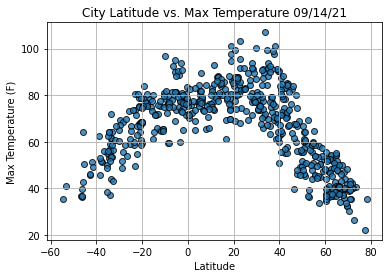

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

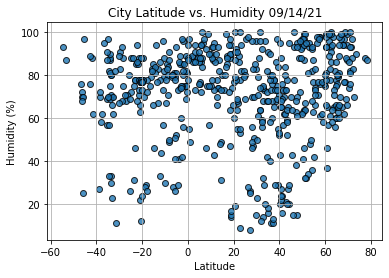

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

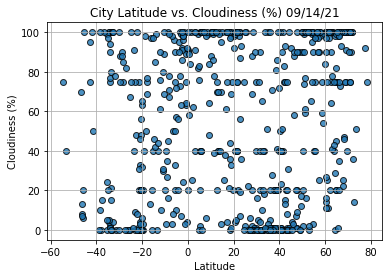

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

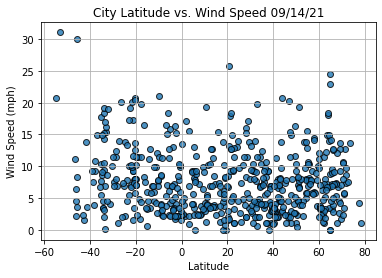

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()